In [93]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [55]:
resp_bali = requests.get('https://data.covid19.go.id/public/api/prov_detail_BALI.json')

cov_bali_raw = resp_bali.json()

In [60]:
cov_bali_raw

{'last_date': '2021-05-13',
 'provinsi': 'BALI',
 'kasus_total': 46124,
 'kasus_tanpa_tgl': 3,
 'kasus_dengan_tgl': 46121,
 'meninggal_persen': 2.8293296331627786,
 'meninggal_tanpa_tgl': 0,
 'meninggal_dengan_tgl': 1305,
 'sembuh_persen': 93.63238227387043,
 'sembuh_tanpa_tgl': 14,
 'sembuh_dengan_tgl': 43173,
 'list_perkembangan': [{'tanggal': 1583884800000,
   'KASUS': 1,
   'MENINGGAL': 1,
   'SEMBUH': 0,
   'DIRAWAT_OR_ISOLASI': 0,
   'AKUMULASI_KASUS': 1,
   'AKUMULASI_SEMBUH': 0,
   'AKUMULASI_MENINGGAL': 1,
   'AKUMULASI_DIRAWAT_OR_ISOLASI': 0},
  {'tanggal': 1583971200000,
   'KASUS': 0,
   'MENINGGAL': 0,
   'SEMBUH': 0,
   'DIRAWAT_OR_ISOLASI': 0,
   'AKUMULASI_KASUS': 1,
   'AKUMULASI_SEMBUH': 0,
   'AKUMULASI_MENINGGAL': 1,
   'AKUMULASI_DIRAWAT_OR_ISOLASI': 0},
  {'tanggal': 1584057600000,
   'KASUS': 0,
   'MENINGGAL': 0,
   'SEMBUH': 0,
   'DIRAWAT_OR_ISOLASI': 0,
   'AKUMULASI_KASUS': 1,
   'AKUMULASI_SEMBUH': 0,
   'AKUMULASI_MENINGGAL': 1,
   'AKUMULASI_DIRAWAT_OR_IS

In [61]:
cov_bali_raw.keys()

dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

In [62]:
cov_bali_raw['kasus_total']

46124

In [79]:
cov_bali = pd.DataFrame(cov_bali_raw['list_perkembangan'])

cov_bali.head()

,tanggal,KASUS,MENINGGAL,SEMBUH,DIRAWAT_OR_ISOLASI,AKUMULASI_KASUS,AKUMULASI_SEMBUH,AKUMULASI_MENINGGAL,AKUMULASI_DIRAWAT_OR_ISOLASI
0,1583884800000,1,1,0,0,1,0,1,0
1,1583971200000,0,0,0,0,1,0,1,0
2,1584057600000,0,0,0,0,1,0,1,0
3,1584144000000,0,0,0,0,1,0,1,0
4,1584230400000,0,0,0,0,1,0,1,0


In [80]:
cov_bali.shape

(429, 9)

In [88]:
# memperbarui format dataset
cov_bali_new_format = (cov_bali.drop(columns=[
    item for item in cov_bali.columns
        if item.startswith('AKUMULASI') 
        or item.startswith('DIRAWAT')])
        .rename(columns = str.lower)
        .rename(columns = {'kasus':'kasus_baru'})
)
cov_bali_new_format['tanggal'] = pd.to_datetime(cov_bali_new_format['tanggal'] * 1e6, unit='ns')
cov_bali_new_format.head()

,tanggal,kasus_baru,meninggal,sembuh
0,2020-03-11,1,1,0
1,2020-03-12,0,0,0
2,2020-03-13,0,0,0
3,2020-03-14,0,0,0
4,2020-03-15,0,0,0


## Grafik Kasus Baru, Sembuh, Meninggal Harian

<Figure size 432x288 with 0 Axes>

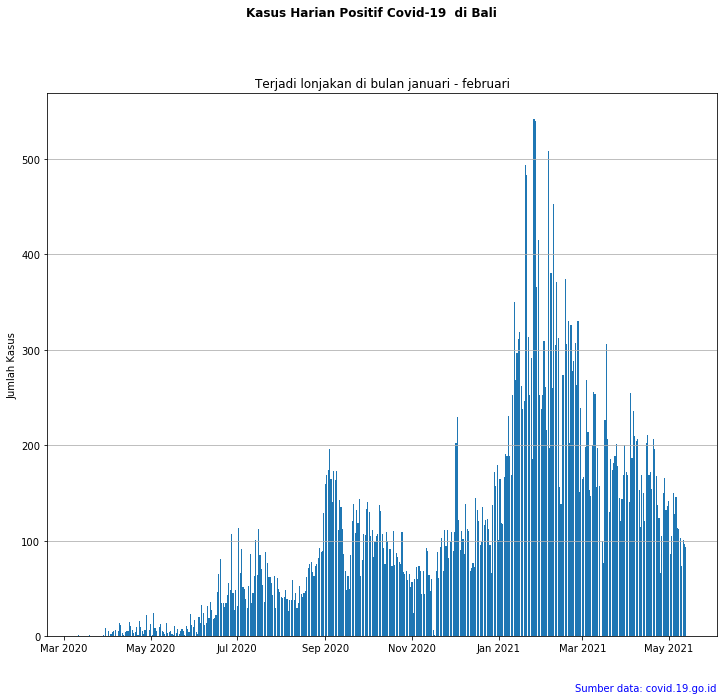

In [134]:
plt.clf()
# fixsize = width, height
fig, ax = plt.subplots(figsize=(12, 10))

ax.bar(data = cov_bali_new_format, x='tanggal', height='kasus_baru')

fig.suptitle('Kasus Harian Positif Covid-19  di Bali', fontweight='bold', ha='center', y=1.00)

ax.set_title('Terjadi lonjakan di bulan januari - februari', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue', ha='right', transform=ax.transAxes)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')

plt.show()

<Figure size 432x288 with 0 Axes>

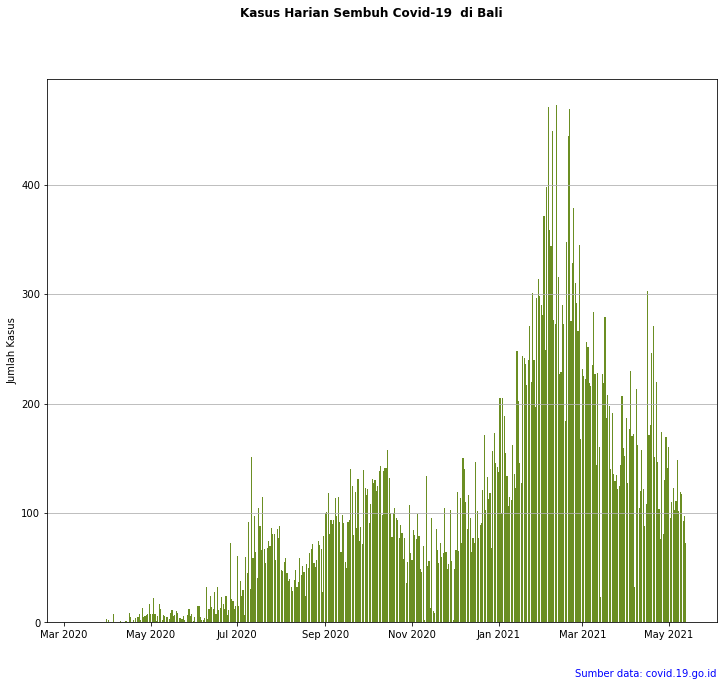

In [139]:
plt.clf()
# fixsize = width, height
fig, ax = plt.subplots(figsize=(12, 10))

ax.bar(data = cov_bali_new_format, x='tanggal', height='sembuh', color='olivedrab')

fig.suptitle('Kasus Harian Sembuh Covid-19  di Bali', fontweight='bold', ha='center')

ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue', ha='right', transform=ax.transAxes)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')

plt.show()

<Figure size 432x288 with 0 Axes>

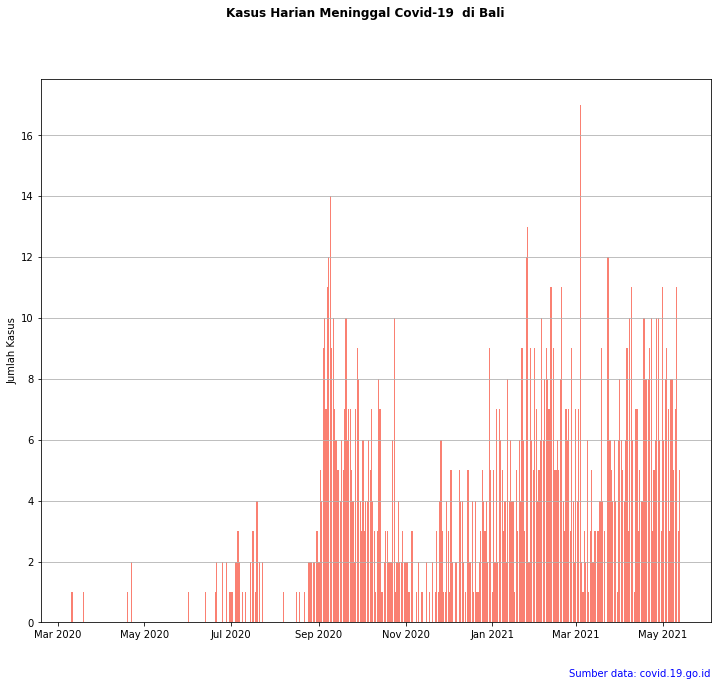

In [142]:
plt.clf()
# fixsize = width, height
fig, ax = plt.subplots(figsize=(12, 10))

ax.bar(data = cov_bali_new_format, x='tanggal', height='meninggal', color='salmon')

fig.suptitle('Kasus Harian Meninggal Covid-19  di Bali', fontweight='bold', ha='center')

ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue', ha='right', transform=ax.transAxes)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')

plt.show()

In [143]:
cov_bali_mingguan = (cov_bali_new_format.set_index('tanggal')['kasus_baru']
                    .resample('W')
                    .sum()
                    .reset_index()
                    .rename(columns={'kasus_baru':'jumlah'}))
cov_bali_mingguan['tahun'] = cov_bali_mingguan['tanggal'].apply(lambda x: x.year)
cov_bali_mingguan['minggu_ke'] = cov_bali_mingguan['tanggal'].apply(lambda x: x.weekofyear)
cov_bali_mingguan = cov_bali_mingguan[['tahun', 'minggu_ke', 'jumlah']]

cov_bali_mingguan.info()
cov_bali_mingguan.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
tahun        62 non-null int64
minggu_ke    62 non-null int64
jumlah       62 non-null int64
dtypes: int64(3)
memory usage: 1.6 KB


,tahun,minggu_ke,jumlah
0,2020,11,1
1,2020,12,1
2,2020,13,1
3,2020,14,29
4,2020,15,45


In [149]:
# membuat kolom baru jumlah pekan lalu
# mengganti NaN dengan 0
# membuat kolom baru lebih jika kolom jumlah bernilai kurang dari kolom jumlah pekan lalu maka bernilai True
cov_bali_mingguan['jumlah_pekanlalu'] = cov_bali_mingguan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_bali_mingguan['lebih_baik'] = cov_bali_mingguan['jumlah'] < cov_bali_mingguan['jumlah_pekanlalu']

cov_bali_mingguan

,tahun,minggu_ke,jumlah,jumlah_pekanlalu,lebih_baik
0,2020,11,1,0,False
1,2020,12,1,1,False
2,2020,13,1,1,False
3,2020,14,29,1,False
4,2020,15,45,29,False
...,...,...,...,...,...
57,2021,15,1194,1313,True
58,2021,16,1053,1194,True
59,2021,17,918,1053,True
60,2021,18,859,918,True


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

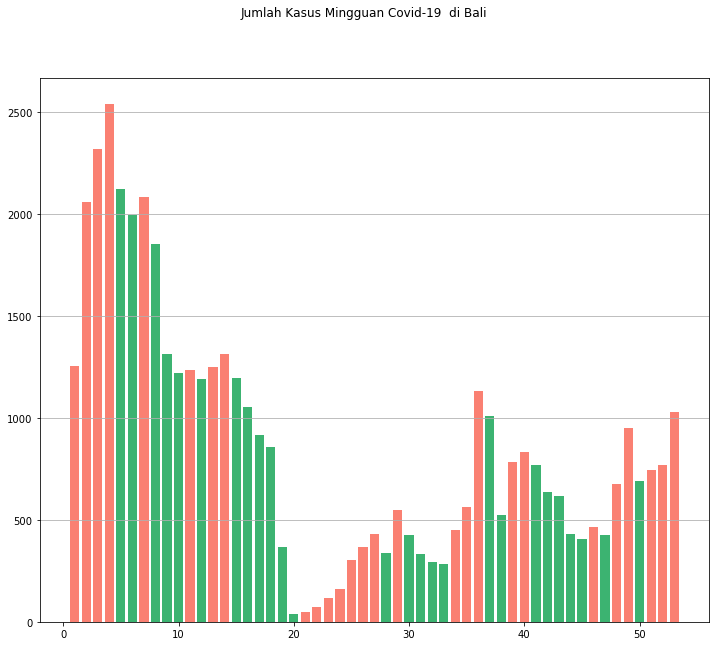

In [151]:
plt.clf()

fig, ax = plt.subplots(figsize=(12,10))

ax.bar(data = cov_bali_mingguan, x='minggu_ke', height='jumlah', color=['mediumseagreen' if x is True else 'salmon' for x in cov_bali_mingguan['lebih_baik']])

fig.suptitle('Jumlah Kasus Mingguan Covid-19  di Bali')

plt.grid(axis='y')

plt.show

## Kolom Baru untuk Akumulasi Aktif

In [154]:
cov_bali_akumulasi = cov_bali_new_format[['tanggal']].copy()

cov_bali_akumulasi['akumulasi_aktif'] = (cov_bali_new_format['kasus_baru'] - cov_bali_new_format['sembuh'] - cov_bali_new_format['meninggal']).cumsum()
cov_bali_akumulasi['akumulasi_sembuh'] = cov_bali_new_format['sembuh'].cumsum()
cov_bali_akumulasi['meninggal'] = cov_bali_new_format['meninggal'].cumsum()

cov_bali_akumulasi.tail()

,tanggal,akumulasi_aktif,akumulasi_sembuh,meninggal
424,2021-05-09,1683,42793,1279
425,2021-05-10,1633,42910,1286
426,2021-05-11,1630,43003,1297
427,2021-05-12,1627,43100,1300
428,2021-05-13,1643,43173,1305


<Figure size 432x288 with 0 Axes>

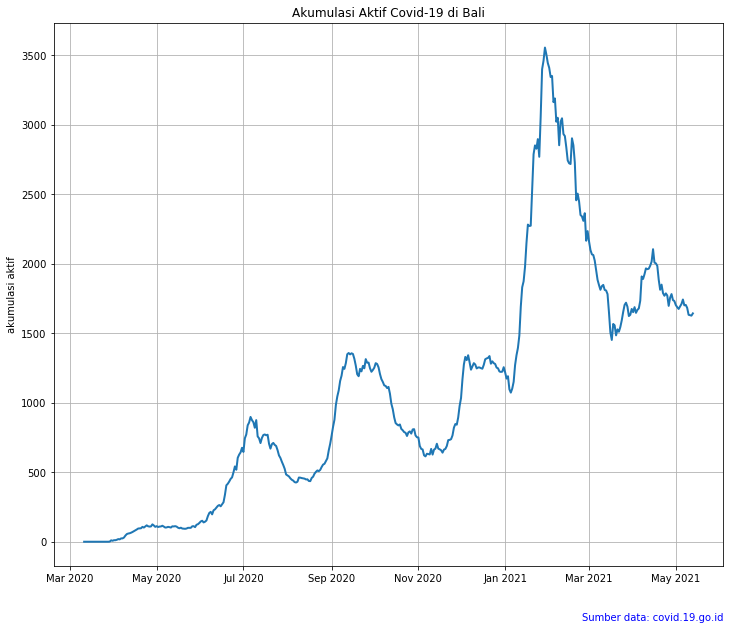

In [158]:
plt.clf()

fix, ax = plt.subplots(figsize=(12, 10))

ax.plot('tanggal', 'akumulasi_aktif', data=cov_bali_akumulasi, lw=2)

ax.set_title('Akumulasi Aktif Covid-19 di Bali')

ax.set_ylabel('akumulasi aktif')

ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.show()

<Figure size 432x288 with 0 Axes>

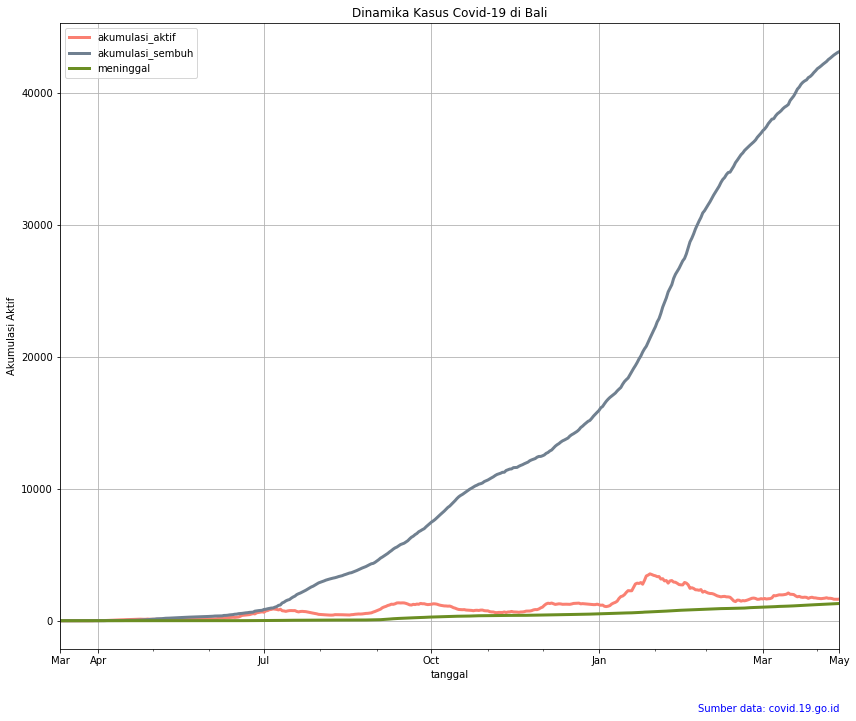

In [161]:
plt.clf()

fig, ax = plt.subplots(figsize=(12, 10))

cov_bali_akumulasi.plot(x='tanggal', kind='line', ax=ax, lw=3, color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus Covid-19 di Bali')

ax.set_ylabel('Akumulasi Aktif')

ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.grid()
plt.tight_layout()
plt.show()